## Chapter 4

### 선형 회귀

입력 특성의 가중치 합과 편향(또는 절편)이라는 상수를 더해 예측을 만드는 모델.

> $$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$
> * $ \hat{y} $ : 예측값
> * $ n $ : 특성의 수
> * $ x_i $ : i번째 특성값
> * $ \theta_j $ : j번째 모델 파라미터
> 
> 또는 벡터로 다음과 같이 표현
> $$ \hat{y} = h_\theta (\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x} $$
> * $ \boldsymbol{\theta} $ : 편향 $ \theta_0 $, 특성 가중치 $ \theta_1 \sim \theta_n $ 를 담은 파라미터 벡터
> * $ \mathbf{x} $ : 샘플의 특성 벡터

선형 회귀 모델에서, 모델이 얼마자 잘 들어맞는지 측정하기 위해 사용되는 성능 지표는 보통 평균 제곱근 오차(RMSE)를 사용. 즉, RMSE 값이 최소화되는 $ \theta $ 를 찾아야 함.  
간단하게는 평균 제곱 오차(MSE)를 구하는 것이 더 빠름.
> $$ MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(\theta^T \mathbf{x}^{(i)} - y^{(i)} \right)^2 $$
> * $ \mathbf{x}^{(i)} $ : i번째 샘플의 특성값 벡터

비용 함수(MSE)를 최소화하는 $ \theta $ 값을 최소화하기 위해 사용하는 해석적인 방법(결과를 얻을 수 있는 수학적 공식을 사용하는 방법)으로는 정규방정식(normal equation)이 있음.
> $$ \hat{\theta} = \left(\mathbf{X}^T \mathbf{X}) \right)^{-1} \mathbf{X}^T \mathbf{y} $$
> * $ \hat{\theta} $ = 비용 함수를 최소화하는 $ \theta $ 값

In [1]:
# 무작위 선형 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

> * $ y=4+3x_1+\text{gaussian noise} $

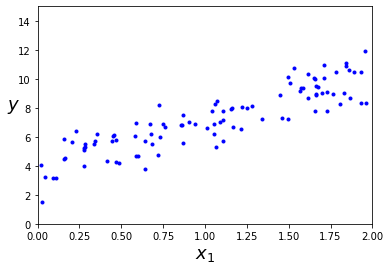

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# 정규방정식을 사용해 theta hat 계산

X_b = np.c_[np.ones((100, 1)), X]   # x0 = 1 추가. x0는 theta0 (편향)에 대한 가상의 특성이라고 생각하면 됨(1을 곱함)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# 위의 함수처럼 theta0 = 4, theta1 = 3을 기대했지만 잡음 때문에 완벽히 재현하지 못함.
theta_best

array([[3.8414874 ],
       [3.23418685]])

In [5]:
# theta hat을 이용한 예측
# x=0, x=2값에 대한 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.8414874 ],
       [10.30986111]])

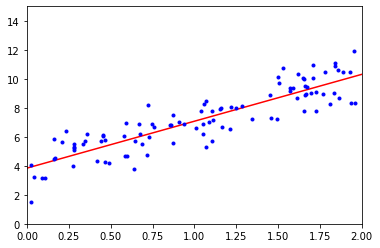

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# scikitlearn에서 선형 회귀 사용
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_   # 각각 편향, 가중치

(array([3.8414874]), array([[3.23418685]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.8414874 ],
       [10.30986111]])

In [10]:
# 직접 구하기(sklearn의 LinearRegression에서 사용하는 방법)
# 유사역행렬(pseudoinverse) 사용. 정규방정식보다 효율적임.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.8414874 ],
       [3.23418685]])

> * 위의 <code>theta_best_svd</code>는 $ \hat{\boldsymbol{\theta}} = \mathbf{X}^+ \mathbf{y} $를 계산함
> * $ \mathbf{X}^+ $는 SVD를 통해 얻을 수 있는 pseudoinverse

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.8414874 ],
       [3.23418685]])

* 정규방정식은 $ (n+1) \times (n+1) $ 크기가 되는 $ \mathbf{X}^T \mathbf{X} $를 구하므로 일반적으로 시간복잡도가 $ O(n^{2.4}) $, $ O(n^3) $사이가 됨. 대신, LinearRegression은 $ O(n^2) $
* n은 특성 수. 훈련 세트의 샘플 수는 증가해도 시간복잡도는 선형적으로 증가함

### 경사 하강법

* 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘.
* 비용 함수를 최적화하기 위해 반복해서 파라미터를 조정함.
* 파라미터 벡터 $ \boldsymbol{\theta} $에 대한 비용 함수의 기울기(gradient, 정확히는 비용 함수의 미분값)를 계산하고, 기울기가 감소하는 방향으로 진행.
* $ \boldsymbol{\theta} $는 임의로 설정(무작위 초기화, random initialization)할 수 있음
* 학습률 파라미터에 의해 반복 횟수 설정
  * 학습률이 너무 낮으면 시간이 오래 걸리고, 너무 높으면 적절한 해법을 잘 찾지 못함.
* 비용 함수는 여러 형태를 띌 수 있으므로, 경사 하강법의 시작 지점에 따라 최솟값에 수렴하기 어렵다는 문제가 있음.
  * MSE는 볼록 함수, 연속 함수, 기울기가 갑자기 변하지 않으므로 영향을 받지 않음.
  * 특성의 스케일이 다르면 최솟값에 도달하는데 시간이 걸리게 됨. 즉, 경사 하강법 사용 시 모든 특성이 같은 스케일을 갖도록(ex. StandardScaler() 등) 해야 함.

* 비용 함수를 계산하려면 각 파라미터 $ \theta_j $ 에 대한 비용 함수의 gradient를 계산해야 함. 즉, $ \theta $ 가 조금 변경될 때 비용 함수가 얼마나 바뀌는 지 계산해야 함. 이를 편도함수(partial derivative)라고 함.
* $ \theta_j $에 대한 비용 함수의 편도함수:
$$ \frac{\partial}{\partial \theta_j} \text{MSE}(\theta) = \frac{2}{m}\sum_{i=1}^{m}\left(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)} $$ 
* 각 파라미터에 대해 계산하지 않고 한번에 계산한다면:
$$ \nabla_\theta\text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
    \frac{\partial}{\partial \theta_0}\text{MSE}(\boldsymbol{\theta}) \\ 
    \frac{\partial}{\partial \theta_1}\text{MSE}(\boldsymbol{\theta}) \\ 
    \vdots \\ 
    \frac{\partial}{\partial \theta_0}\text{MSE}(\boldsymbol{\theta}) \\ 
\end{pmatrix} = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol{\theta}-\mathbf{y}) $$ 
* 매 경사 하강법 step에서 전체 훈련 세트 X에 대해 계산하고(매 step마다 훈련 데이터 전체를 사용), 이를 배치 경사 하강법(batch gradient descent)이라고 함.
* 매우 큰 훈련 세트에서는 아주 느리지만, 특성 수에 민갛마지 않음(특성이 매우 많다면 정규방정식이나 SVD보다는 경사 하강법이 나음.).
* 위로 향하는 gradient 벡터가 구해진다면 반대 방향인 아래로 가야 함. 즉, $ \boldsymbol{\theta} $에서 $ \nabla_\theta\text{MSE}(\boldsymbol{\theta}) $를 빼야 함. 이 과정에서 학습률 $ \eta $가 필요함.
$$ \boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta\nabla_{\boldsymbol{\theta}}\text{MSE}(\boldsymbol{\theta}) $$

In [12]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)    # 파라미터 theta를 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [13]:
# 위에서 정규방정식을 이용해 구한 값과 동일
theta

array([[3.8414874 ],
       [3.23418685]])

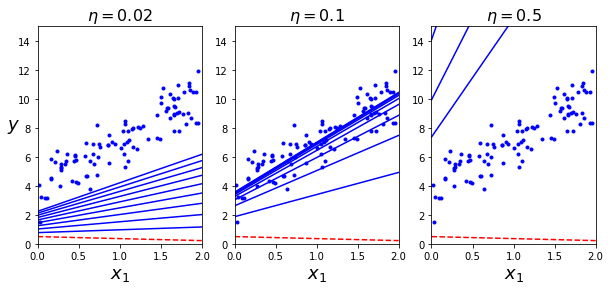

In [14]:
# 여러 학습률에 대한 경사하강법(from https://github.com/rickiepark/handson-ml2/blob/master/04_training_linear_models.ipynb)
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

> * 왼쪽은 학습률이 너무 낮아 언젠가는 최적점에 도달하겠지만 시간이 오래 걸릴 것.
> * 오른쪽은 학습률이 너무 높아 각 반복마다 최적점에서 점점 멀어짐.
> * 가운데는 학습률이 적절함.

* 적절한 학습률을 찾기 위해서는 그리드 탐색(GridSearchCV)을 사용함. 단, 시간이 오래 걸리는 것을 막기 위해 반복 횟수를 제한해야 함.
* 반복 횟수가 너무 크면 파라미터가 이미 최적점에 도달하고도 계속 반복하여 시간을 낭비하게 되고, 반복 횟수가 너무 작으면 파라미터가 최적점에 도달하기도 전에 멈추게 됨. 이를 해결하기 위해, 반복 횟수를 매우 크게 지정하고 gradient 벡터가 아주 작아지면, 즉 벡터의 norm이 허용오차 $ \epsilon $보다 작아지면 알고리즘을 중지함.

* 배치 경사 하강법은 매 step마다 전체 훈련 세트를 사용하므로, 흔련 세트가 커지면 매우 오래 걸림.
* 확률적 경사 하강법을 사용하면 매 step마다 한 개의 샘플을 무작위로 선택하여, 해당 샘플에 대한 gradient를 계산.
  * 매우 큰 훈련세트도 무리없이 훈련시킬 수 있고, 속도가 빠름.
  * 배치 경사 하강법보다 훨씬 불안정함.(비용 함수가 최솟값에 다다를 때 까지 부드럽게 감소하지 않고 위아래로 요동침.)
  * 배치 경사 하강법보다 지역 최솟값을 건너뛰거나 빠져나올 확률이 높아 전역 최솟값을 찾을 가능성이 높아짐. 대신, 전역 최솟값에 완전히 다다르지는 못함(계속 요동치므로). 이를 해결하기 위해 학습률을 점점 감소시키는 것이 좋음. 매 반복마다 학습률을 결정하는 함수를 학습 스케줄(learning schedule)이라고 함.
  * 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 가기도 전에 멈출 수 있고, 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해 지역 최솟값에 머물 수 있음.

In [15]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

# 한 반복당 m번 되풀이되고, 각 반복을 epoch라고 함.

for epoch in range(n_epochs):
    for i in range(m):  # m = 100, 훈련 세트에 있는 샘플 수.
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[3.81538658],
       [3.25273131]])

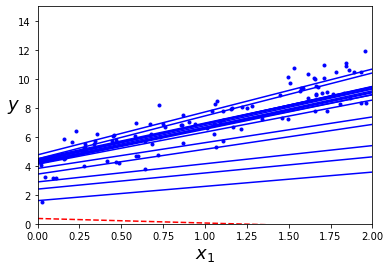

In [17]:
theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()  

* 한 epoch에서 특정 샘플이 여러번 선택될 수 있고 어떤 샘플은 전혀 선택되지 않을 수 있음.
* 각 epoch마다 모든 샘플을 사용하게 하려면 훈련 세트를(레이블과 동일하게) 섞어서 차례대로 하나씩 선택하고, 다음 epoch에서 다시 섞는 식의 방법을 사용할 수 있음. 단, 이 방식은 보통 수렴하는 시간이 더 오래 걸림.
  * SGDClassifier(), SGDRegressor()가 사용.

In [18]:
from sklearn.linear_model import SGDRegressor

# 최대 1000번의 epoch, 한 epoch당 0.001(1e-3)보다 적게 손실이 줄어들 때 까지 실행, 기본 학습률은 0.1, 규제는 사용하지 않음.
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77456167]), array([3.27508963]))

* 각 step에서 전체 훈련세트나 하나의 샘플이 아닌 임의의 작은 샘플 세트(미니배치)에 대해 gradient를 계산하는 방법을 미니배치 경사 하강법(mini-batch gradient descent)이라고 함.
  * GPU사용 시 성능 향상을 기대할 수 있음.
  * 미니배치 크기를 키우면 SGD보다 덜 불규칙적으로 움직여 최솟값에 더 가까이 도달할 수 있지만 지역 최솟값에서 빠져나오기 더 힘들어질 수 있음.

In [20]:
# from https://github.com/rickiepark/handson-ml2/blob/master/04_training_linear_models.ipynb
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta

array([[3.83944222],
       [3.24135967]])

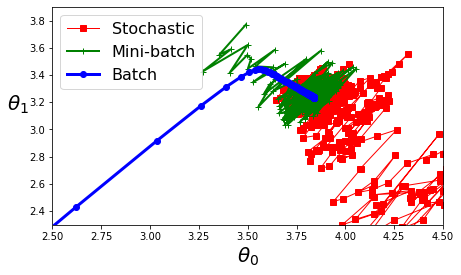

In [22]:
# 알고리즘별 훈련 과정
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

* 선형 회귀를 사용한 알고리즘 비교

|알고리즘            |m이 클 때|외부 메모리 학습 지원|n이 클 때|하이퍼파라미터 수|스케일 조정 필요|scikitlearn       |
|-------------------|---------|-------------------|---------|---------------|---------------|------------------|
|정규방정식          |빠름     |No                 |느림      |0              |No             |N/A               |
|SVD                |빠름     |No                  |느림     |0              |No             |LinearRegression  |
|배치 경사 하강법    |느림      |No                 |빠름     |2              |Yes            |SGDRegressor       |
|확률적 경사 하강법  |빠름      |Yes                |빠름      |$ \geq $ 2    |Yes             |SGDRegressor      |
|미니배치 경사 하강법|빠름      |Yes                |빠름      |$ \geq $ 2    |Yes             |SGDRegressor      |

### 다항 회귀

* 단순한 선형이 아닌 비선형 데이터를 학습하기 위해 각 특성의 거듭제곱을 새로운 특성으로 추가하여 훈련시키는 것을 다항 회귀라고 함.

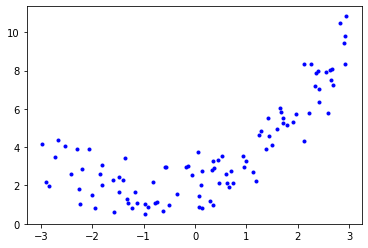

In [23]:
# 잡음이 포함된 2차방정식 형태의 데이터 추가

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.show()

In [24]:
# 훈련 세트의 각 특성을 제곱하여 새로운 특성으로 추가
# PolynomialFeatures의 기본 degree는 2.
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [25]:
X[0]

array([2.38942838])

In [26]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [27]:
# 새로운 특성이 추가된 X_poly를 LinearRegression을 이용해 학습
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [28]:
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [29]:
X_pred = np.linspace(-3,3,100).reshape(100,1)
X_pred_poly = poly_features.fit_transform(X_pred)
y_pred = lin_reg.predict(X_pred_poly)

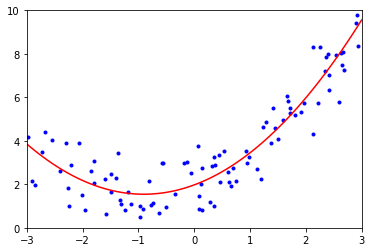

In [30]:
plt.plot(X, y, "b.")
plt.plot(X_pred, y_pred ,"r-")
plt.axis([-3, 3, 0, 10])
plt.show()

> * 원래 함수 : $ y = 0.5x_1^2 + 1.0x_1 + 2.0 + \text{gaussian noise} $
> * 예측 함수 : $ y = 0.46x_1^2 + 0.94x_1 + 1.98 $

* 특성이 여러 개일 때 다항 회귀는 특성간의 관계를 찾을 수 있음.
  * PolynomialFeatures()는 주어진 차수까지 특성 간의 모든 교차항을 추가(ex. <code>degree=3</code>일 때, $ a^2, a^3, b^2, b^3, ab, a^2b, ab^2 $ 도 추가

### 학습 곡선

* 고차 다항 회귀는 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞추려 함. 즉, 차수가 너무 높으면 훈련 데이터에 과대적합됨.

* 어떤 모델을 사용할 지(몇 차수를 사용할지), 모델이 데이터에 과대/과소적합되었는지 파악하기 위해서는 학습 곡선을 살펴볼 수 있음.
* 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄.
* 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시켜 그래프를 만들 수 있음.

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(10,5))
    plt.axis([0, 80, 0, 5])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")
    plt.show()

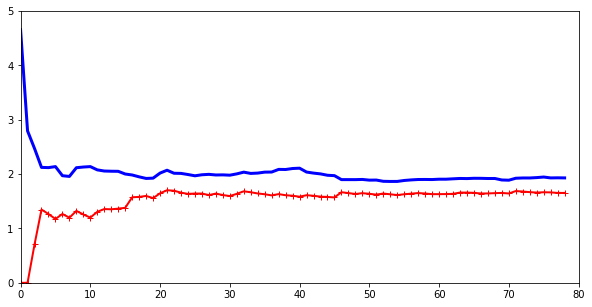

In [32]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

> * 훈련 세트에 하나 혹은 두 개의 샘플이 있을 때는 모델이 완벽하게 작동(RMSE가 0).
> * 훈련 세트에서 샘플이 추가될 때 마다 잡음도 있고 비선형이기 때문에 모델이 완벽히 학습하는 것이 불가능함.
>   * 특정 지점 이후부터 성능이 더 좋아지거나 나빠지지 않음.
> * 검증 세트에서 적은 양의 샘플로는 제대로 일반화할 수 없어 검증 오차가 초기에는 매우 큼(RMSE가 2.5에서 시작)
> * 검증 세트에서 샘플이 추가될 때 마다 검증 오차가 천천히 감소
> * 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 점점 완만해져 훈련 세트의 그래프와 가까워짐.

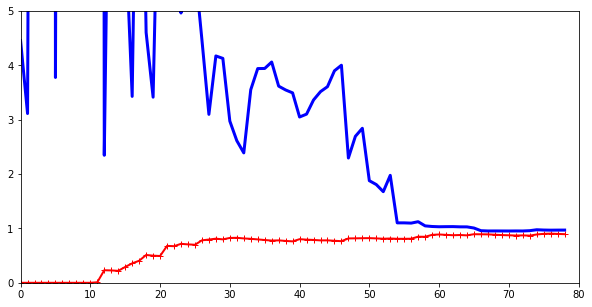

In [33]:
# 같은 데이터에서 10차 다항 회귀 모델 학습 곡선 그리기

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

> * 훈련 데이터의 오차가 선형 회귀 모델보다 낮음
> * 두 곡선 사이에 공간이 존재, 즉 과대적합되어있음.
>   * 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐

* 모델의 일반화 오차는 아래 세가지 다른 종류의 오차의 합으로 표현할 수 있음.
  * 편향 : 잘못된 가정으로 인한 오차(ex. 실제 데이터는 2차인데 선형으로 가정하는 경우). 훈련 데이터에 과소적합되기 쉬움
    * 선형 모델의 상수항 특성인 편향과 다름
  * 분산 : 훈련 데이터의 작은 변동에 모델이 과도하게 민감하기 때문에 나타남. 고차 다항 회귀 모델과 같이 자유도가 높은 모델이 분산이 높고, 훈련 데이터에 과대적합되기 쉬움.
  * 줄일 수 없는 오차(irreducible error) : 데이터 자체의 잡음 때문에 발생. 오차를 줄일 유일한 방법은 잡음을 제거하는 것 밖에 없음.

### 규제가 있는 선형 모델

* 과대적합을 감소시키기 위해 모델을 규제(모델을 제한)할 수 있음.
* 다항 회귀 모델을 규제하는 방법으로는 차수 감소가 있음.
* 선형 회귀 모델을 규제하는 방법으로는 모델의 가중치를 제한하는 방법이 있음.
  * 릿지 회귀, 라쏘 회귀, 엘라스틱넷

* 릿지 회귀(ridge, 혹은 티호노프 규제) : 규제가 추가된 선형 회귀. 규제항 $ \alpha \sum_{i=1}^n \theta_i^2 $ 가 비용 함수에 추가됨.
  * 학습 알고리즘을 데이터에 맞추고, 모델의 가중치가 작게 유지되도록 노력함.
  * 규제항은 훈련하는 동안에만 비용 함수에 추가.
  * 모델의 훈련이 끝나면 모델 성능은 규제가 없는 성능 지표로 평가.
  * $ \alpha $ : 모델을 얼마나 많이 규제할지 조절. $ \alpha=0 $ 이면 선형 회귀와 같아지고, $ \alpha $ 가 아주 커지면 모든 가중치가 거의 0에 가까워지고 데이터의 평균을 지나는 수평선이 됨.
  * 릿지 회귀의 비용 함수는 다음과 같음 $$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta})+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2 $$
  * $ \theta_0 $ 는 규제되지 않음
  * 규제항에 1/2를 곱한 것은 미분 결과를 간단하게 만들기 위해서임.
  * 입력 특성에 민감하기 대문에 데이터의 스케일을 맞춰야 함(ex. StandardScaler()등 사용)

In [34]:
# 선형 데이터 생성

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

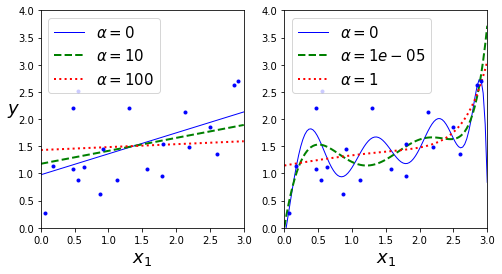

In [35]:
# 여러 alpha를 사용해 릿지 모델을 훈련시킨 결과
# 왼쪽은 평범한 릿지 모델, 오른쪽은 PolynomialFeatrures(degree=10)으로 데이터를 확장한 뒤 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델 적용(즉, 릿지 규제를 사용한 다항 회귀)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

> * $ \alpha $ 값이 커질수록 직선에 가까워짐. 즉, 모델의 분산은 줄어들지만 편향은 커지게 됨.

* 릿지 회귀 계산을 위해 정규방정식이나 경사하강법을 사용할 수 있음.
  * 릿지 회귀의 정규방정식의 해: $$ \hat{\boldsymbol{\theta}}= (\mathbf{X}^T\mathbf{X}+\alpha\mathbf{A})^{-1}\mathbf{X}^T\mathbf{y} $$
  * $ \mathbf{A} $ : 편향에 해당하는 맨 왼쪽 위의 원소가 0인 $ (n+1)\times(n+1) $ 단위행렬

In [36]:
# 정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")   # Cholesky decomposition을 사용해 변형한 방정식 사용.
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [37]:
# 확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(penalty="l2")    # 가중치 벡터의 l2 norm의 제곱을 2로 나눈 규제항을 비용 함수에 추가
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

# 또는 다음과 같이 사용할 수도 있음
# ridge_reg = Ridge(alpha=1, solver="sag")
#               ...

array([1.46543286])

* 라쏘(Least absolut shrinkage and selection operator, Lasso) 회귀 : 규제가 추가된 선형 회귀. 릿지 회귀처럼 비용 함수에 규제항을 더하지만 가중치 벡터의 $ l_1 $ 노름을 사용
  * 라쏘 회귀의 비용 함수: $$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta})+\alpha\sum_{i=1}^n\left|\theta_i\right| $$
  * 덜 중요한 특성의 가중치를 제거하려고 함(ex. 아래의 그래프에서 $ \alpha=1e-07 $은 3차방정식처럼 보이고, 이는 차수가 높은 다항 특성의 가중치가 모두 0이 된 결과). 즉, 자동으로 특성 선택을 하고 희소 모델을 만듦(0이 아닌 특성의 가중치가 적음.)

c:\users\lijm1\desktop\ml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


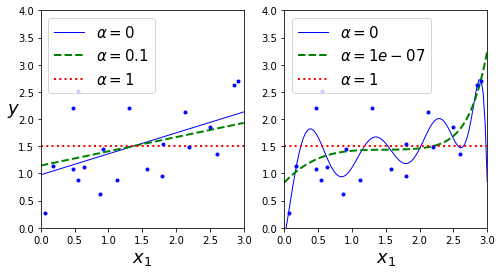

In [38]:
# 여러 alpha를 사용해 라쏘 모델을 훈련시킨 결과
# 릿지 모델보다 더 작은 alpha값 사용
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

* 라쏘의 비용 함수는 $ \theta_i=0 $ 일 때미분 가능하지 않지만, 서브그레이디언트 벡터(subgradient vector, 미분이 불가능한 지점 근방 gradient들의 중간값 정도로 생각하면 됨) $ \mathbf{g} $ 를 사용하면 경사 하강법을 적용하는데 문제가 없음.
$$ g(\boldsymbol{\theta}, J) = \nabla_\theta\text{MSE}(\boldsymbol{\theta})+\alpha\begin{pmatrix}
    \text{sign}(\theta_1) \\
    \text{sign}(\theta_2) \\ 
    \vdots \\ 
    \text{sign}(\theta_n) \\
\end{pmatrix}, \text{sign}(\theta_i)=\left\{\begin{matrix} -1 & \theta_i<0 \\ 0 & \theta_i=0 \\ +1 & \theta_i>0 \\ \end{matrix}\right. $$

In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# Lasso 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음.

array([1.53788174])

* 엘라스틱넷(elastic net) : 릿지 회귀와 라쏘 회귀를 절충한 모델. 규제항은 릿지 회귀와 라쏘 회귀의 규제항을 더해서 사용하고, 혼합 정도는 혼합 비율 $ r $ 을 사용해 조절.
  * $ r=0 $ 이면 릿지 회귀와 같고, $ r=1 $ 이면 라쏘 회귀와 같음.
$$ j(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta})+r\alpha\sum_{i=1}^n \left| \theta_i \right|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$

* 일반적으로 규제가 약간 있는 것이 좋으므로 평범한 선형 회귀는 피하는 것이 좋음. 릿지를 기본적으로 사용하고, 특성이 몇개뿐이라고 의심되면 라쏘나 엘라스틱넷이 좋음.
* 특성 수가 샘플 수보다 많거나, 특성 몇 개가 강하게 연관되어 있다면 라쏘보다는 엘라스틱넷이 좋음.

In [40]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

* 조기 종료 : 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하기 위해, 검증 에러사 최솟값에 도달하면 바로 훈련을 중지시키는 것.

In [41]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [42]:
# 조기 종료 구현
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

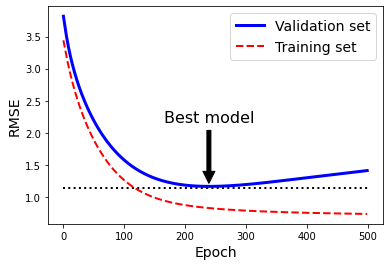

In [43]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

> * 배치 경사 하강법으로 훈련시킨 고차원 다항 회귀 모델.
> * 에포크가 진행됨에 따라 훈련 세트와 검증 세트에 대한 RMSE가 점차 줄어들다가, 특정 시점에서 검증 세트의 RMSE가 상승하게 됨(과대적합되기 시작.). 해당 시점에 도달 시 훈련을 멈추는 것을 조기 종료라고 함.

### 로지스틱 회귀

* 샘플이 특정 클래스에 속할 확률을 추정하는데 사용.
  * 추정 확률이 50%가 넘으면 샘플이 해당 클래스에 속한다고 함(양성 클래스). 그렇지 않으면 음성 클래스.

* 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산하고 편향을 더하지만 결과값의 로지스틱(logistic)을 출력. $$ \hat{p}=h_{\boldsymbol{\theta}}(\mathbf{x})=\sigma(\boldsymbol{\theta}^T\mathbf{x}) $$
  * 로지스틱 : $ \sigma(t)=\frac{1}{1+\text{exp}(-t)} $ . 0과 1 사이의 값을 출력하는 시그모이드 함수.
  * 샘플 $ \mathbf{x} $가 양성 클래스에 속할 확률 $ \hat{p}=h_{\boldsymbol{\theta}}(\mathbf{x}) $ 를 추정하면 이를 통해 예측 $ \hat{y} $ 을 쉽게 구할 수 있음. $$ \hat{y}=\left\{\begin{matrix} 0 & \hat{p}<0.5 \\ 1 & \hat{p}\geq0.5 \\ \end{matrix}\right. $$
  * sigmoid함수는 0을 기준으로 0.5보다 작거나, 클수 있으므로 $ \boldsymbol{\theta}^T\mathbf{x} $ 가 양수일 때 양성 클래스라 예측하고, 음수일 때 음성 클래스라고 예측함. 

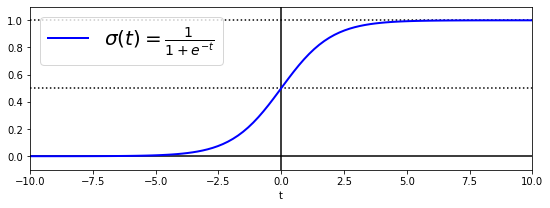

In [46]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

* 모델 훈련은 양성 샘플에 대해서는 높은 확률을 추정하고, 음성 샘플에 대해서는 낮은 확률을 추정하게 하는 모델의 파라미터 벡터 $ \boldsymbol{\theta} $ 를 찾아야 함.
* 하나의 훈련 샘플 $ \mathbf{x} $ 에 대한 비용 함수(y: 레이블) $$ c(\boldsymbol{\theta})=\left\{\begin{matrix} -\log(\hat{p}) & ,y=1 \\ -\log(1-\hat{p}) & ,y=0 \\ \end{matrix}\right. $$
  * 모델이 양성 샘플을 0에 가까운 확률로 추정하거나 음성 샘플을 1에 가까운 확률로 추정하면 비용이 크게 증가.(t가 0에 가까워지면 -log(t)는 매우 커짐)
* 전체 훈련 세트에 대한 비용 함수(로그 손실. logloss) $$ J(\boldsymbol{\theta}) = -\frac{1}{m}\sum_{i=1}^m\left[y^{(i)}\log\left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right)\log\left(1-\hat{p}^{(i)}\right)\right] $$
  * 로그 선실의 최솟값을 계산하는 알려진 해는 없음(정규방정식과 같은 것이 없음)
  * 볼록 함수이므로 경사 하강법을 사용할 수 있음.
  * j번쨰 모델 파라미터 $ \theta_j $ 에 대해 편미분하면 $$ \frac{\partial}{\partial\theta_j}J(\boldsymbol{\theta})=\frac{1}{m}\sum_{i=1}^m\left(\sigma\left(\boldsymbol{\theta}^T\mathbf{x}^{(i)}\right)-y^{(i)}\right)x_j^{(i)} $$

In [48]:
# 붓꽃 데이터셋을 로지스틱 회귀 모델에 사용
# 세 개의 품종에 속하는 150개의 꽃잎과 꽃받침의 너비와 길이를 담고 있음.

from sklearn import datasets
iris = datasets.load_iris()

In [49]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [65]:
X = iris["data"][:, 3:]                 # 꽃잎의 너비
y = (iris["target"] == 2).astype(int)   # 품종이 Iris-Virginica면 1, 아니면 0

In [64]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

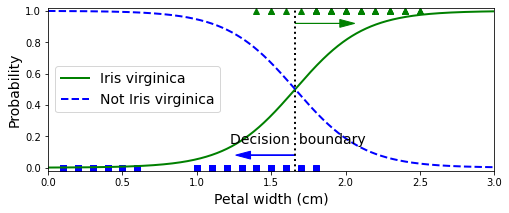

In [67]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 확률 추정
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# 그래프 출력
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

> * Iris Verginica(초록색 삼각형)의 꽃잎 너비는 약 1.4\~2.5cm 사이에 분포, 다른 꽃(파란색 사각형)의 꽃잎 너비는 0.1\~18cm사이에 분포
>   * 일부 구간이 중첩됨.
>   * 꽃잎 너비가 2cm 이상이면 모델은 해당 꽃이 Iris Verginica라고 강하게 확신함(확률이 높다고 출력.). 1cm 이하라면 아니라고 강하게 확신함(확률이 낮다고 출력).
>   * 결정 경계(Decision boundary, 양쪽의 확률이 똑같이 50%가 되는 지점)보타 크면 양성 클래스로 분류, 그렇지 않으면 음성 클래스로 분류하게 됨.

In [68]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

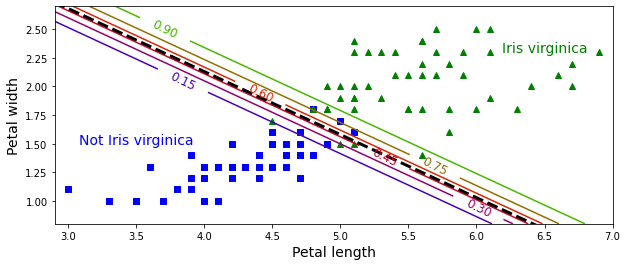

In [70]:
# 꽃잎 너비와 꽃잎 길이 두 개의 특성으로 로지스틱 회귀 분류기를 훈련.

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

> * 점선은 모델이 50%확률임을 추정하는 지점(결정 경계)
> * 파란색 실선(0.15, 15%)부터 초록색 실선(0.90, 90%)은 모델이 특정 확률을 출력하는 포인트.

* 로지스틱 회귀 모델도 $ l_1, l_2 $ 규제가 가능함(scikitleran은 기본적으로 l2 사용)

### 소프트맥스 회귀

* 로지스틱 회귀 모델은 여러 이진 분류기를 묶을 필요 없이 직접 다중 클래스를 지원하도록 일반화될 수 있고, 이를 소프트맥스 회귀(softmax regression) 또는 다항 로지스틱 회귀(multinomial logistic regression)라고 함.
* 샘플 $ \mathbf{x} $ 가 주어지면 소프트맥스 회귀 모델이 각 클래스 $ k $ 에 대한 점수 $ s_k(\mathbf{x}) $를 계산하고, 해당 점수에 소프트맥스 함수(또는 정규화된 지수 함수라고도 함.)를 적용하여 각 클래스의 확률을 추정. $$ s_k(\mathbf{x})=\left(\boldsymbol{\theta}^{(k)}\right)^T\mathbf{x} $$
  * 각 클래스마다 자신만의 파라미터 벡터 $ \boldsymbol{\theta}^{(k)} $ 가 존재, 이 벡터들은 파라미터 행렬 $ \boldsymbol{\Theta} $ 의 행으로 저장됨.
* 소프트맥스 함수는 샘플 $ \mathbf{x} $ 각각에 대한 점수에 지수 함수를 적용한 뒤 정규화함(모든 지수 함수의 결과의 합으로 나눔.). 이 점수를 로짓(logit) 또는 로그-오즈라고 함. $$ \hat{p_k}=\sigma\left(\mathbf{s}(\mathbf{x})\right)_k=\frac{\exp\left(s_k(\mathbf{x})\right)}{\sum_{j=1}^K\exp\left(s_j(\mathbf{x})\right)} $$
  * $ K $ 는 클래스 수
  * $ \mathbf{s}(\mathbf{x}) $ 는 샘플 $ \mathbf{x} $ 에 대한 각 클래스의 점수를 탐은 벡터
  * $ \sigma\left(\mathbf{s}(\mathbf{x})\right)_k $ 는 샘플 $ \mathbf{x} $에 대한 각 클래스의 점수가 주어졌을 때, 이 샘플이 클래스 k에 속할 추정 확률
* 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택함. $$ \hat{y}= \underset{\rm \text{k}}{\rm \text{argmax}}\;\sigma\left(\mathbf{s}\left(\mathbf{x}\right)\right)_k=\underset{\rm \text{k}}{\rm \text{argmax}}\;s_k\left(\mathbf{x}\right)=\underset{\rm \text{k}}{\rm \text{argmax}}\;\left(\left(\boldsymbol{\theta}^{(k)}\right)^T\mathbf{x}\right) $$
  * argmax : 함수를 최대화하는 변수의 값 반환
* 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측함(다중 출력이 아님.). 즉, 상호 배타적인 클래스에서만 사용 가능.


* 소프트맥스 회귀 분류기를 훈련하기 위해서는 크로스 엔트로피(cross entropy) 비용 함수를 사용. $$ J(\boldsymbol{\Theta})=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}\log\left(\hat{p}_k^{(i)}\right) $$
  * 해당 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제함.
  * 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용됨.
  * K=2라면(클래스가 두 개만 있다면) 로지스틱 회귀의 비용 함수(logloss)와 동일함.
* 크로스 엔트로피의 $ \boldsymbol{\theta}^{(k)} $ 에 대한 그레이디언트 벡터: $$ \nabla_{\boldsymbol{\theta}^{(k)}}J(\boldsymbol{\Theta})=\frac{1}{m}\sum_{i=1}^m\left(\hat{p}_k^{(i)}-y_k^{(i)}\right)\mathbf{x}^{(i)} $$
  * 이를 이용해 비용 함수를 최소화하기 위한 파라미터 행렬 $ \boldsymbol{\Theta} $를 찾기 위해 경사 하강법 등을 사용할 수 있음.

In [71]:
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)   # multi_class=multinomial을 넣어 softmax 회귀를 사용할 수 있음. 소프트맥스 회귀 사용 시,
                                                                                    # solver를 "lbfgs"와 같은 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함.
                                                                                    # C를 사용해 l2 규제 적용.
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [72]:
softmax_reg.predict([[5, 2]])   # 꽃잎 길이가 5cm, 너비가 2cm인 붓꽃에 대한 예측.(결과는 Iris-Virginica(2))

array([2])

In [73]:
softmax_reg.predict_proba([[5, 2]]) # Iris-Virginica일 확률은 94.2%, Iris-Versicolor(1)일 확률은 5.8%

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

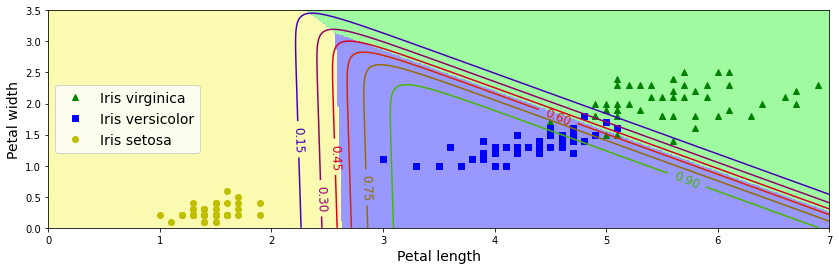

In [75]:
# 그래프로 표시
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(14, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

> * 클래스들 사이의 결정 경계는 선형
> * 이진 분류기와 달리 50% 이하인 클래스를 예측할 수도 있음(ex. 모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 33%의 추정 확률을 가짐.)